In [1]:
import sys
sys.path.append('..')
import ImpedanceSynthesiser as imps
import numpy as np
import matplotlib.pyplot as pl
%matplotlib notebook

reload(imps)

<module 'ImpedanceSynthesiser' from '../ImpedanceSynthesiser.pyc'>

In [58]:
world = imps.AcousticWorld()

l0 = 1.0
lb = .5

rad0 = .0075
rad_end = [.0075,.0035,.002,.001]

ducts = []

duct = imps.Duct(world=world,losses=True)
duct.set_termination(imps.PerfectOpenEnd())
duct.append_element(imps.StraightDuct(length=lb,radius=rad0))
ducts.append(duct)

for rad_e in rad_end:
    duct = imps.Duct(world=world,losses=True)
    duct.set_termination(imps.PerfectOpenEnd())
    duct.append_element(imps.StraightDuct(length=lb,radius=rad0))
    duct.append_element(imps.StraightDuct(length=l0-lb,radius=rad_e))
    ducts.append(duct)

duct = imps.Duct(world=world,losses=True)
duct.set_termination(imps.PerfectClosedEnd())
duct.append_element(imps.StraightDuct(length=lb,radius=rad0))
ducts.append(duct)

<IPython.core.display.Javascript object>


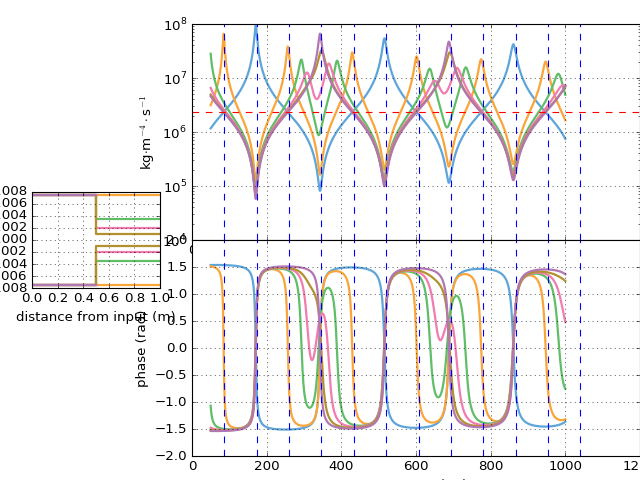

In [59]:
fvec = np.linspace(10,1000,1000)

#fig,ax=pl.subplots(2,sharex=True)

ax = None
for duct in ducts:
    if ax is None:
        ax=duct.plot_report( fmax=max(fvec), npoints=2000)
    else:
        duct.plot_report(ax=ax, fmax=max(fvec), npoints=2000)
    
ax[1].axhline((np.abs(duct.elements[0].get_characteristic_impedance())),
              lw=1,ls='--',color='r')

f=0
c=duct.speed_of_sound
while f < max(fvec):
    f+=c/(4*l0)
    ax[1].axvline(f,ls='--',lw=1)
    ax[2].axvline(f,ls='--',lw=1)

<IPython.core.display.Javascript object>


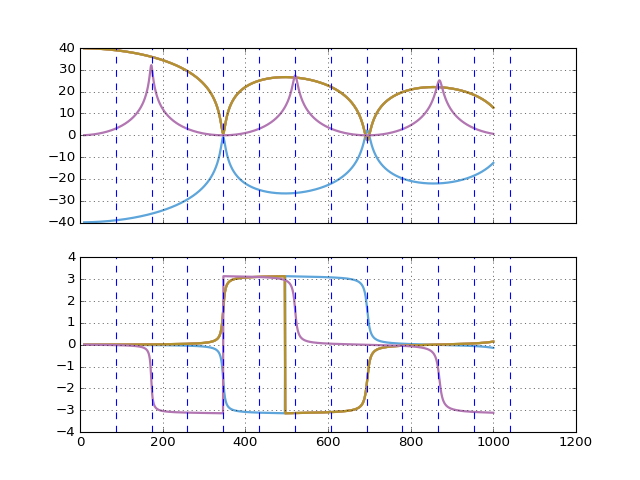

In [60]:
fvec = np.linspace(10,1000,1000)

fig,ax=pl.subplots(2,sharex=True)

pos= [0.005,lb-0.005]

for duct in ducts:
    tf = duct.pressure_transfer_func(fvec,from_pos=pos[0],to_pos=pos[1])
    ax[0].plot(fvec,20*np.log10(np.abs(tf)))
    ax[1].plot(fvec,(np.angle(tf)))
    
#ax[1].axhline((np.abs(duct.elements[0].get_characteristic_impedance())),
#              lw=1,ls='--',color='r')

f=0
c=duct.speed_of_sound
while f < max(fvec):
    f+=c/(4*l0)
    ax[0].axvline(f,ls='--',lw=1)
    ax[1].axvline(f,ls='--',lw=1)

In [ ]:
np.matmul?

In [ ]:
aa=np.arange(2*2*4).reshape(2,2,4)

In [ ]:
np.dot(aa.swapaxes(0,2),aa.swapaxes(0,2)).swapaxes(0,2)

In [ ]:
[np.matmul(aa[:,:,ii],aa[:,:,ii]) for ii in range(4)]

In [36]:
el=ducts[1].elements[0]
tm0=el.normalized_two_point_transfer_mx_at_freq(fvec)
el=ducts[1].elements[1]
tm1=el.normalized_two_point_transfer_mx_at_freq(fvec)

In [40]:
sw = [0,2]
np.matmul(tm0.swapaxes(*sw),tm1.swapaxes(*sw)).swapaxes(*sw)

array([[[ 0.94487952+0.0113424j ,  0.93397608+0.01294511j,
          0.92212767+0.01460735j, ...,  0.58465690-0.29757636j,
          0.61243397-0.28970192j,  0.63942731-0.28172777j],
        [-0.07089392-0.56768645j, -0.07373531-0.61983803j,
         -0.07639858-0.67164538j, ..., -0.56539786+1.43680566j,
         -0.57082771+1.39354939j, -0.57611676+1.34979822j]],

       [[-0.00915509-0.11825884j, -0.00951424-0.12936456j,
         -0.00984640-0.1404061j , ..., -0.06933302+0.36580367j,
         -0.07048942+0.35640974j, -0.07161518+0.34690803j],
        [ 0.98800279+0.00251327j,  0.98562862+0.00286619j,
          0.98304865+0.00323206j, ...,  0.90961726-0.06116764j,
          0.91566651-0.05944919j,  0.92154509-0.05770902j]]])

In [ ]:
z=el._chain_impedance_at_freq(freq=fvec,z_end=np.ones(len(fvec))*np.inf)
el._chain_impedance_at_freq(freq=fvec,z_end=z).shape

In [ ]:
tm

In [ ]:
ff=100
el.normalized_two_point_transfer_mx_at_freq(ff)

In [ ]:
ffidx = np.argmin(np.abs(fvec-ff))
el.normalized_two_point_transfer_mx_at_freq(fvec)[:,:,ffidx]

In [ ]:
np.argmin(np.abs(fvec-ff))

In [ ]:
el.get_propagation_coefficient(fvec)

In [ ]:
[[el.get_length() for el in dd.elements] for dd in ducts]